# Answer for task by Denisenko Fyodor

First of all it needs to load data and merge to tables in one.

In [4]:
#Importing libraries and loading synthetic_data.csv in "synthetic_data" variable.
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
synthetic_data = pd.read_csv("synthetic_data.csv")
synthetic_data

,Unnamed: 0,depo,segment,channel,clicks,latency,client_id
0,0,0,postid_4057,smm,1.0,2.649725,1442498
1,1,0,telegram,affiliate,10.0,2.610846,7865631
2,2,0,postid_8542,facebook,13.0,3.001162,8165584
3,3,0,telegram,direct,0.0,1.788369,5893056
4,4,0,telegram,smm,0.0,1.932069,3780924
...,...,...,...,...,...,...,...
219309,219309,0,postid_8032,social media,15.0,3.821367,5580482
219310,219310,0,telegram,smm,20.0,2.701804,2069153
219311,219311,0,postid_5025,smm,7.0,4.276089,1433197
219312,219312,0,telegram,smm,0.0,4.055800,2963137


In [5]:
#Loading countries.csv in "countries" variable.
countries = pd.read_csv("countries.csv")
countries

,country,client_id
0,IN,6348826
1,FR,6751691
2,DE,8638448
3,LT,4722696
4,ES,2411132
...,...,...
219309,IT,4136333
219310,DE,2377444
219311,FR,2938414
219312,IN,6384400


In [6]:
#Merging two tables in one
initial_data =  synthetic_data.merge(countries,\
                                               on='client_id')
initial_data

,Unnamed: 0,depo,segment,channel,clicks,latency,client_id,country
0,0,0,postid_4057,smm,1.0,2.649725,1442498,IT
1,0,0,postid_4057,smm,1.0,2.649725,1442498,IT
2,1,0,telegram,affiliate,10.0,2.610846,7865631,LU
3,1,0,telegram,affiliate,10.0,2.610846,7865631,LU
4,2,0,postid_8542,facebook,13.0,3.001162,8165584,MO
...,...,...,...,...,...,...,...,...
219309,157555,0,telegram,smm,29.0,1.699514,5942604,ES
219310,157556,0,telegram,social media,0.0,1.803509,1391815,IN
219311,157557,0,postid_4873,facebook,2.0,1.801382,3967839,IN
219312,157558,0,postid_2733,facebook,0.0,3.846842,7962805,US


Let's answer the questions.

# 1). How users are distributed over countries?

Firstly, it needs to calculate amount of users from every country. Secondly, it needs to make a barplot with count of users from every country.

In [6]:
#Finding count of users from every country and sorting.
countries_distribution = initial_data\
                                  .groupby('country',as_index = False)\
                                  .agg({'client_id':'count'})\
                                  .sort_values('client_id',ascending = False)\
                                  .rename(columns = {'client_id':'client_count'})
countries_distribution

,country,client_count
0,DE,20202
1,ES,20130
9,US,20105
4,IS,20013
2,FR,19946
6,LT,19917
10,VN,19893
8,MO,19864
3,IN,19844
5,IT,19833


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'country')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


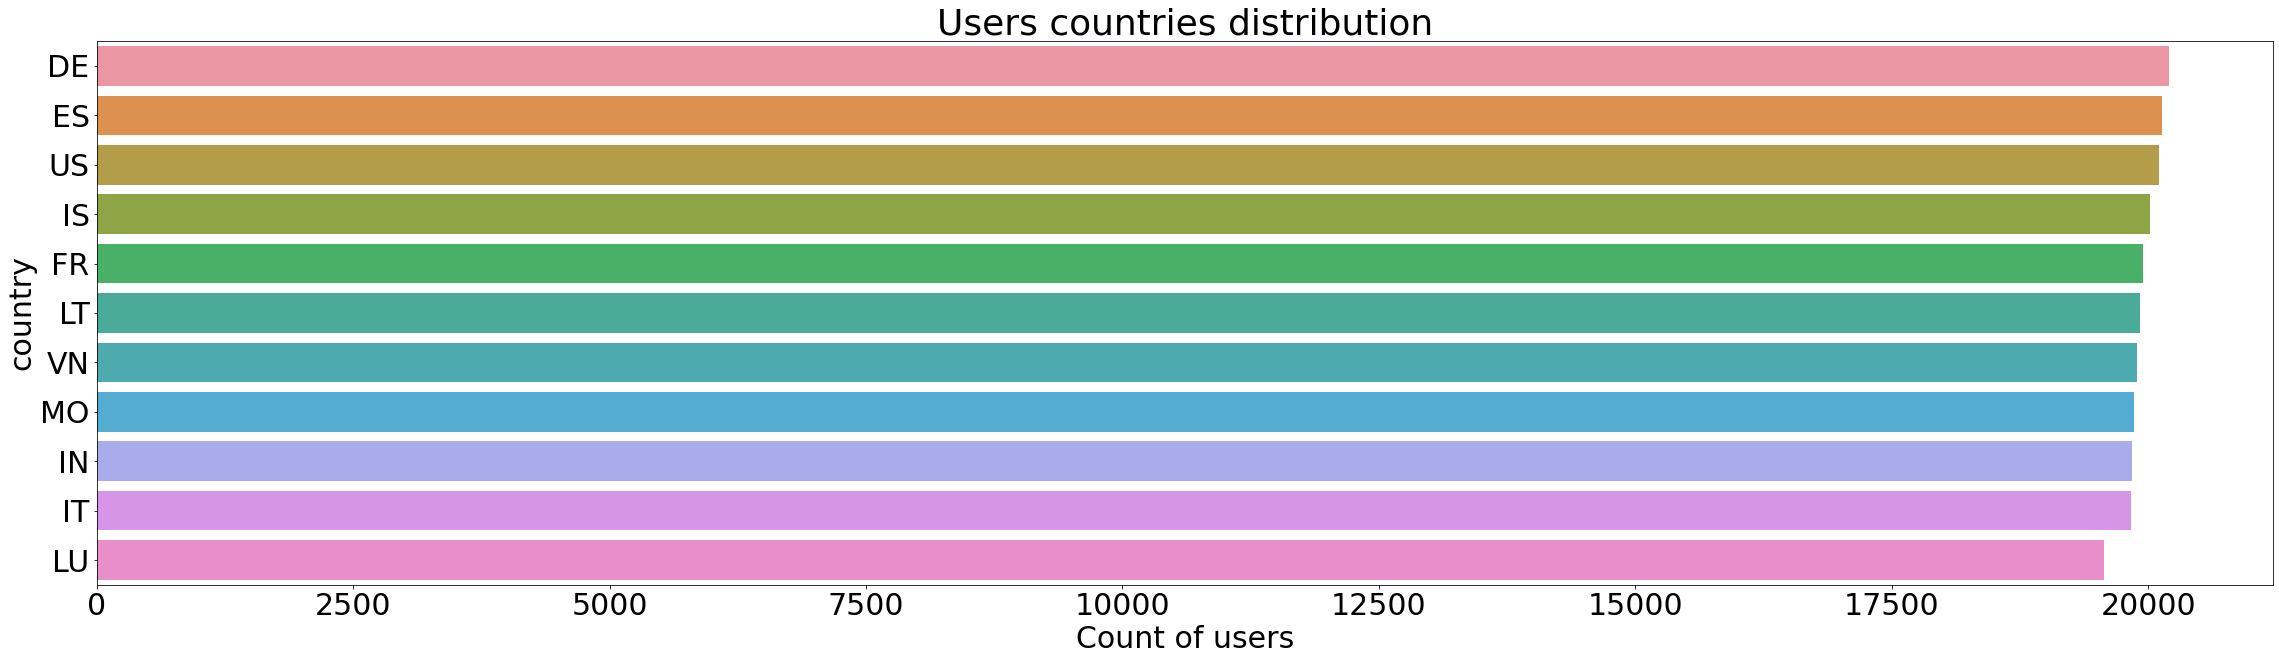

In [5]:
#Building the barplot with using privious table.
font = {'family': 'normal', 'size':'30'}
plt.rc('font',**font)
plt.figure(figsize=(39,10))
ax1=sns.barplot(countries_distribution.client_count,countries_distribution.country)
ax1.set_title('Users countries distribution')
ax1.set_xlabel('Count of users')
ax1.set_ylabel('country')

To sum up, users are distributed over countries evenly. User amount in every country is in the range between 19567 and 20202.

# 2). How many outliers are there in data (in terms of deposits)?

Firstly, it needs to find the biggest depo values and calculate its amount.\
Secondly, it needs to find profit from every user for all time to build total profit distribution.\
Thirdly, it needs to find the smallest depo values and calculate its amount.

In [24]:
# Finding the biggest depo values and calculating its amount.
the_biggest_profit = initial_data.query("depo > 1000")
the_biggest_profit

,Unnamed: 0,depo,segment,channel,clicks,latency,client_id,country
12636,6318,13298,postid_8728,smm,0.0,2.899959,6982697,ES
12637,6318,13298,postid_8728,smm,0.0,2.899959,6982697,ES
12942,6471,16258,postid_8501,facebook,39.0,7.072755,1974000,VN
12943,6471,16258,postid_8501,facebook,39.0,7.072755,1974000,VN
22204,11102,12134,telegram,social media,0.0,3.325395,6453930,LT
...,...,...,...,...,...,...,...,...
210964,149210,21998,postid_3779,facebook,17.0,3.596715,6775661,MO
210982,149228,27737,telegram,social media,20.0,2.639091,1504016,IS
212129,150375,10005,postid_8100,smm,19.0,4.648678,2426531,FR
215043,153289,12807,telegram,direct,48.0,1.406783,4757653,DE


In [6]:
#Finding profit from every user for all time
total_profit_per_user = initial_data\
                                    .groupby('client_id',as_index = False)\
                                    .agg({'depo':'sum'})\
                                    .sort_values('depo',ascending = False)\
                                    .rename(columns = {'depo':'total_profit_per_user'})
total_profit_per_user

,client_id,total_profit_per_user
38835,2968855,45736
44738,3263919,44920
8869,1449003,43498
111045,6624368,41802
17321,1884057,39186
...,...,...
72232,4664789,-106
117164,6938263,-108
12324,1625348,-150
122419,7207056,-164


In [1]:
# Building profit distribution for every user for all time.
font = {'family': 'normal', 'size':'30'}
plt.rc('font',**font)
plt.figure(figsize=(39,10))
ax2=sns.lineplot(data=total_profit_per_user, x="client_id", y="total_profit_per_user")
ax2.set_title('User total profit distribution')

NameError: name 'plt' is not defined

In [8]:
# Finding the smallest depo values per user.
total_profit_per_user.query('total_profit_per_user < 0')

,client_id,total_profit_per_user
76967,4902229,-2
133161,7757743,-3
4532,1226981,-3
94063,5769157,-4
114621,6808593,-5
...,...,...
72232,4664789,-106
117164,6938263,-108
12324,1625348,-150
122419,7207056,-164


In [42]:
# Calculating amount of rows with the smallest depo values.
negative_profit = initial_data.query("depo < 0")
negative_profit

,Unnamed: 0,depo,segment,channel,clicks,latency,client_id,country,T_F_postid
494,247,-3,telegram,social media,0.0,3.393788,5930737,LU,False
495,247,-3,telegram,social media,0.0,3.393788,5930737,LU,False
1788,894,-6,telegram,social media,4.0,1.906850,5131530,FR,False
1789,894,-6,telegram,social media,4.0,1.906850,5131530,FR,False
3552,1776,-20,telegram,direct,31.0,2.078781,5818342,IN,False
...,...,...,...,...,...,...,...,...,...
210203,148449,-31,telegram,affiliate,36.0,3.111986,7188598,IT,False
212756,151002,-62,telegram,affiliate,40.0,3.000000,6488222,IT,False
213360,151606,-18,telegram,social media,45.0,2.213038,1309043,LT,False
216144,154390,-11,telegram,direct,34.0,3.812777,8125744,MO,False


Answer: \
1). There are 88 outliers in data. These rows have depo values which are bigger then 1000.\
2). There are 94 outliers in data. These rows have depo values which are negative. It was happend with 70 users.

# 3). Find segments with best conversion rate (client/lead ratio) and explain why you consider them best ones

There are four ways to segment users: in terms of counties, channels, telegram channels and post channels.
Here there is conversion rate calculation for every way.

In [9]:
# Calculation of unique leads count in every country.
country_lead_amount = initial_data\
                         .groupby('country',as_index = False)\
                         .agg({'client_id':'nunique'})\
                         .rename(columns = {'client_id':'lead_amount'})
country_lead_amount

,country,lead_amount
0,DE,14504
1,ES,14443
2,FR,14292
3,IN,14215
4,IS,14407
5,IT,14211
6,LT,14341
7,LU,14120
8,MO,14226
9,US,14427


In [10]:
# Calculation of unique clients count in every country.
country_client_amount = initial_data\
                            .query('depo > 0')\
                            .groupby('country',as_index = False)\
                            .agg({'client_id':'nunique'})\
                            .rename(columns = {'client_id':'client_amount'})
country_client_amount

,country,client_amount
0,DE,677
1,ES,659
2,FR,623
3,IN,672
4,IS,687
5,IT,643
6,LT,646
7,LU,641
8,MO,615
9,US,657


In [11]:
# Calculation of conversion rate in every country.
country_conversion_rate = country_client_amount.merge(country_lead_amount, on = "country")
country_conversion_rate['conversion_rate'] = country_conversion_rate.client_amount / country_conversion_rate.lead_amount
country_conversion_rate = country_conversion_rate.sort_values('conversion_rate',ascending = False)
country_conversion_rate

,country,client_amount,lead_amount,conversion_rate
4,IS,687,14407,0.047685
3,IN,672,14215,0.047274
0,DE,677,14504,0.046677
10,VN,667,14374,0.046403
1,ES,659,14443,0.045628
9,US,657,14427,0.045540
7,LU,641,14120,0.045397
5,IT,643,14211,0.045247
6,LT,646,14341,0.045046
2,FR,623,14292,0.043591


In [12]:
# Calculation of unique leads count in every channel.
channel_lead_amount = initial_data\
                         .groupby('channel',as_index = False)\
                         .agg({'client_id':'nunique'})\
                         .rename(columns = {'client_id':'lead_amount'})
channel_lead_amount

,channel,lead_amount
0,affiliate,7812
1,direct,15625
2,facebook,55029
3,smm,47359
4,social media,30137


In [13]:
# Calculation of unique clients count in every channel.
channel_client_amount = initial_data\
                            .query('depo > 0')\
                            .groupby('channel',as_index = False)\
                            .agg({'client_id':'nunique'})\
                            .rename(columns = {'client_id':'client_amount'})
channel_client_amount

,channel,client_amount
0,affiliate,386
1,direct,696
2,facebook,2878
3,smm,2616
4,social media,544


In [14]:
# Calculation of conversion rate in every channel.
channel_conversion_rate = channel_client_amount.merge(channel_lead_amount, on = "channel")
channel_conversion_rate['conversion_rate'] = channel_conversion_rate.client_amount / channel_conversion_rate.lead_amount
channel_conversion_rate = channel_conversion_rate.sort_values('conversion_rate',ascending = False)
channel_conversion_rate

,channel,client_amount,lead_amount,conversion_rate
3,smm,2616,47359,0.055238
2,facebook,2878,55029,0.052300
0,affiliate,386,7812,0.049411
1,direct,696,15625,0.044544
4,social media,544,30137,0.018051


In [15]:
# Finding all telegram users.
telegram_users = initial_data.query('segment == "telegram"')
telegram_users


,Unnamed: 0,depo,segment,channel,clicks,latency,client_id,country
2,1,0,telegram,affiliate,10.0,2.610846,7865631,LU
3,1,0,telegram,affiliate,10.0,2.610846,7865631,LU
6,3,0,telegram,direct,0.0,1.788369,5893056,US
7,3,0,telegram,direct,0.0,1.788369,5893056,US
8,4,0,telegram,smm,0.0,1.932069,3780924,FR
...,...,...,...,...,...,...,...,...
219297,157543,0,telegram,smm,24.0,1.307860,4966194,MO
219305,157551,0,telegram,smm,15.0,3.903090,6688396,IS
219307,157553,0,telegram,smm,6.0,2.769763,7904603,LU
219309,157555,0,telegram,smm,29.0,1.699514,5942604,ES


In [16]:
# Finding all post users.
post_users = initial_data.query('segment != "telegram"')
post_users

,Unnamed: 0,depo,segment,channel,clicks,latency,client_id,country
0,0,0,postid_4057,smm,1.0,2.649725,1442498,IT
1,0,0,postid_4057,smm,1.0,2.649725,1442498,IT
4,2,0,postid_8542,facebook,13.0,3.001162,8165584,MO
5,2,0,postid_8542,facebook,13.0,3.001162,8165584,MO
10,5,0,postid_6929,direct,45.0,4.927500,5225501,IS
...,...,...,...,...,...,...,...,...
219306,157552,0,postid_6685,smm,15.0,4.261472,4412060,LU
219308,157554,0,postid_1843,direct,0.0,2.465814,1362465,IS
219311,157557,0,postid_4873,facebook,2.0,1.801382,3967839,IN
219312,157558,0,postid_2733,facebook,0.0,3.846842,7962805,US


In [17]:
# Calculation of unique leads count in every telegram channel.
telegram_lead_amount = telegram_users\
                                      .groupby('channel',as_index = False)\
                                      .agg({'client_id':'nunique'})\
                                      .rename(columns = {'client_id':'lead_amount'})
telegram_lead_amount

,channel,lead_amount
0,affiliate,2252
1,direct,4359
2,facebook,14945
3,smm,13678
4,social media,8720


In [18]:
# Calculation of unique clients count in every telegram channel.
telegram_client_amount = telegram_users\
                                        .query('depo > 0')\
                                        .groupby('channel',as_index = False)\
                                        .agg({'client_id':'nunique'})\
                                        .rename(columns = {'client_id':'client_amount'})
telegram_client_amount

,channel,client_amount
0,affiliate,169
1,direct,263
2,facebook,501
3,smm,1320
4,social media,544


In [19]:
# Calculation of conversion rate in every telegram channel.
telegram_conversion_rate = telegram_client_amount.merge(telegram_lead_amount, on = "channel")
telegram_conversion_rate['conversion_rate'] = telegram_conversion_rate.client_amount / telegram_conversion_rate.lead_amount
telegram_conversion_rate = telegram_conversion_rate.sort_values('conversion_rate',ascending = False)
telegram_conversion_rate

,channel,client_amount,lead_amount,conversion_rate
3,smm,1320,13678,0.096505
0,affiliate,169,2252,0.075044
4,social media,544,8720,0.062385
1,direct,263,4359,0.060335
2,facebook,501,14945,0.033523


In [20]:
# Calculation of unique leads count in every post channel.
post_lead_amount = post_users\
                              .groupby('channel',as_index = False)\
                              .agg({'client_id':'nunique'})\
                              .rename(columns = {'client_id':'lead_amount'})
post_lead_amount

,channel,lead_amount
0,affiliate,5560
1,direct,11266
2,facebook,40084
3,smm,33681
4,social media,21417


In [21]:
# Calculation of unique clients count in every post channel.
post_client_amount = post_users\
                               .query('depo > 0')\
                               .groupby('channel',as_index = False)\
                               .agg({'client_id':'nunique'})\
                               .rename(columns = {'client_id':'client_amount'})
post_client_amount

,channel,client_amount
0,affiliate,217
1,direct,433
2,facebook,2377
3,smm,1296


In [22]:
# Calculation of conversion rate in every post channel.
post_conversion_rate = post_client_amount.merge(post_lead_amount, on = "channel")
post_conversion_rate['conversion_rate'] = post_conversion_rate.client_amount / post_conversion_rate.lead_amount
post_conversion_rate = post_conversion_rate.sort_values('conversion_rate',ascending = False)
post_conversion_rate

,channel,client_amount,lead_amount,conversion_rate
2,facebook,2377,40084,0.059300
0,affiliate,217,5560,0.039029
3,smm,1296,33681,0.038479
1,direct,433,11266,0.038434


Answer: 

The best segment is telegram users, who has come from smm. It has 0.0965 conversion rate. It is so because:\
1). The value 0.0965 is the biggest among all segments. \
2). In countries conversion rate is very similar to each other. So it is hard to choose segments amond countries and it didn't use.\
3). Latency and clickes were also very similar to each other in every segments and it didn't use.

Social media in posts gives zero profit. But social media	in telegram gives 544 profitable clients. It looks strangely. Maybe it needs to modify this channel.

# 4). Visualize deposits distribution over sources and channels

There are three distributions: over sources, over channels, over sources and channels.

In [2]:
# Finding segments with post where True means post, False means telegram
initial_data['T_F_postid']=initial_data.segment.str.contains("postid", regex=False)
initial_data

NameError: name 'initial_data' is not defined

In [24]:
# Finding depo sum for telegram and post. 
segment_depo_sum = initial_data\
                               .groupby('T_F_postid',as_index = False)\
                               .agg({'depo':'sum'})\
                               .rename(columns = {'depo':'depo_sum'})
segment_depo_sum

,T_F_postid,depo_sum
0,False,1281714
1,True,3400466


In [25]:
# Deposits distribution over telegram and posts. 
segment_depo_sum ['sources'] = segment_depo_sum.T_F_postid.replace({False:'telegram',True:'post'})
segment_depo_sum = segment_depo_sum.drop(['T_F_postid'], axis=1)
segment_depo_sum

,depo_sum,sources
0,1281714,telegram
1,3400466,post


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Sources')

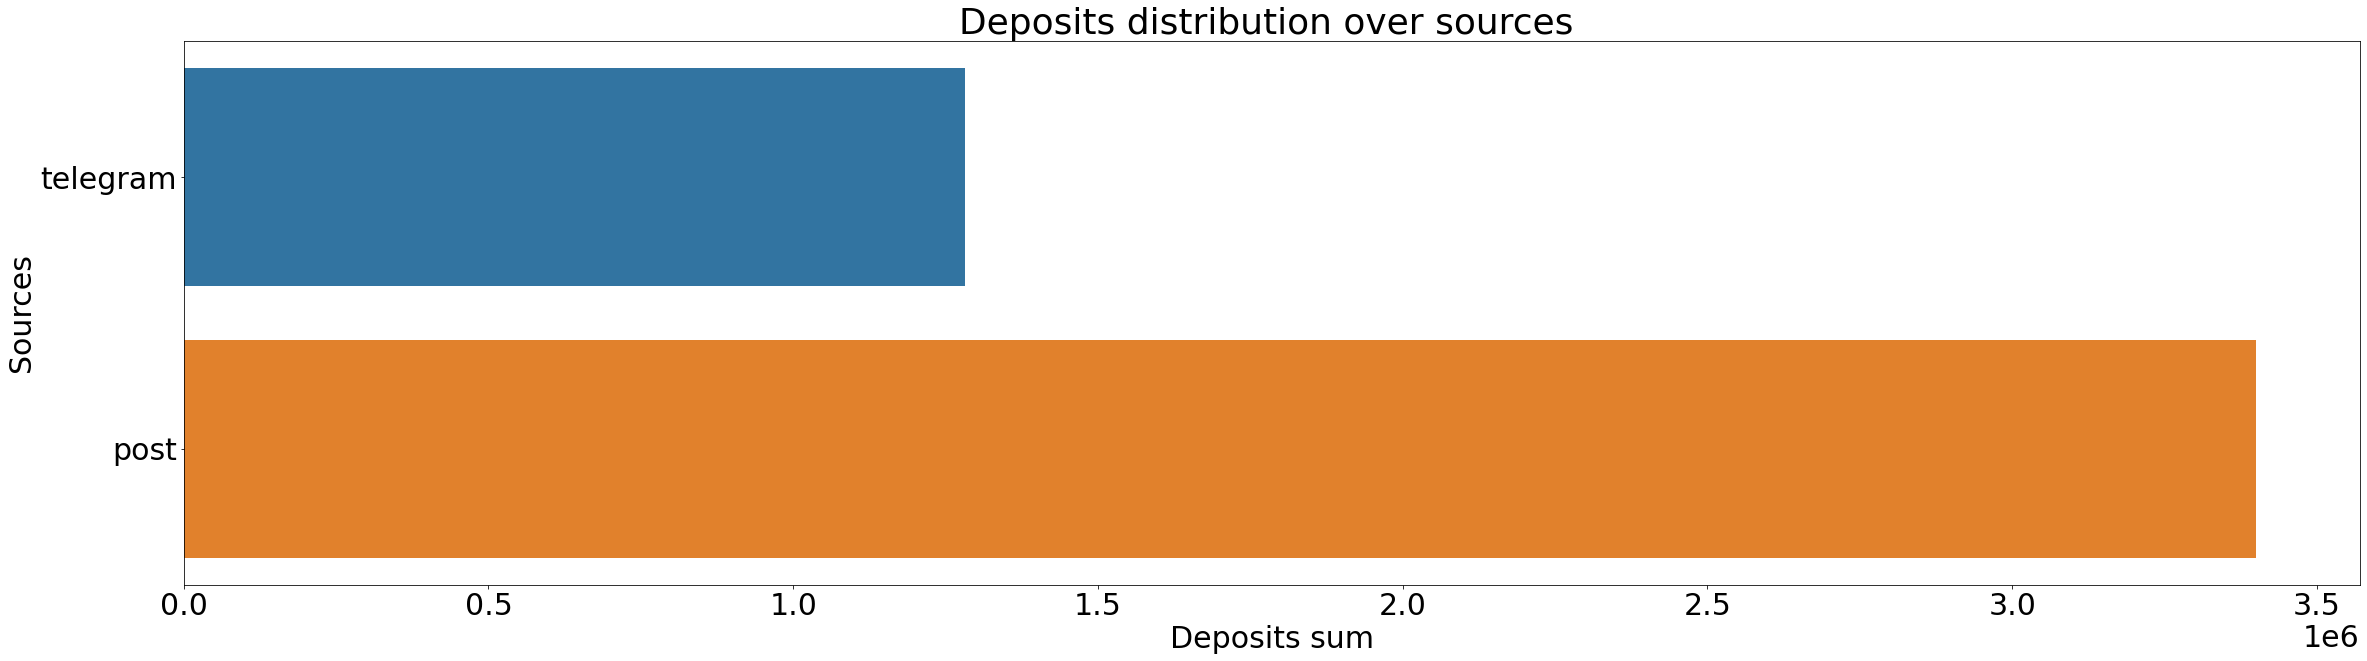

In [26]:
# Visualisation of deposits distribution over sources.
font = {'family': 'normal', 'size':'30'}
plt.rc('font',**font)
plt.figure(figsize=(39,10))
ax3=sns.barplot(segment_depo_sum.depo_sum,segment_depo_sum.sources)
ax3.set_title('Deposits distribution over sources ')
ax3.set_xlabel('Deposits sum')
ax3.set_ylabel('Sources')

In [27]:
# Finding depo sum for all channels.
channel_depo_sum = initial_data\
                               .groupby('channel',as_index = False)\
                               .agg({'depo':'sum'})\
                               .rename(columns = {'depo':'depo_sum'})\
                               .sort_values('depo_sum',ascending = False) 
channel_depo_sum

,channel,depo_sum
2,facebook,2114831
3,smm,1557828
1,direct,486446
4,social media,325849
0,affiliate,168075


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Channels')

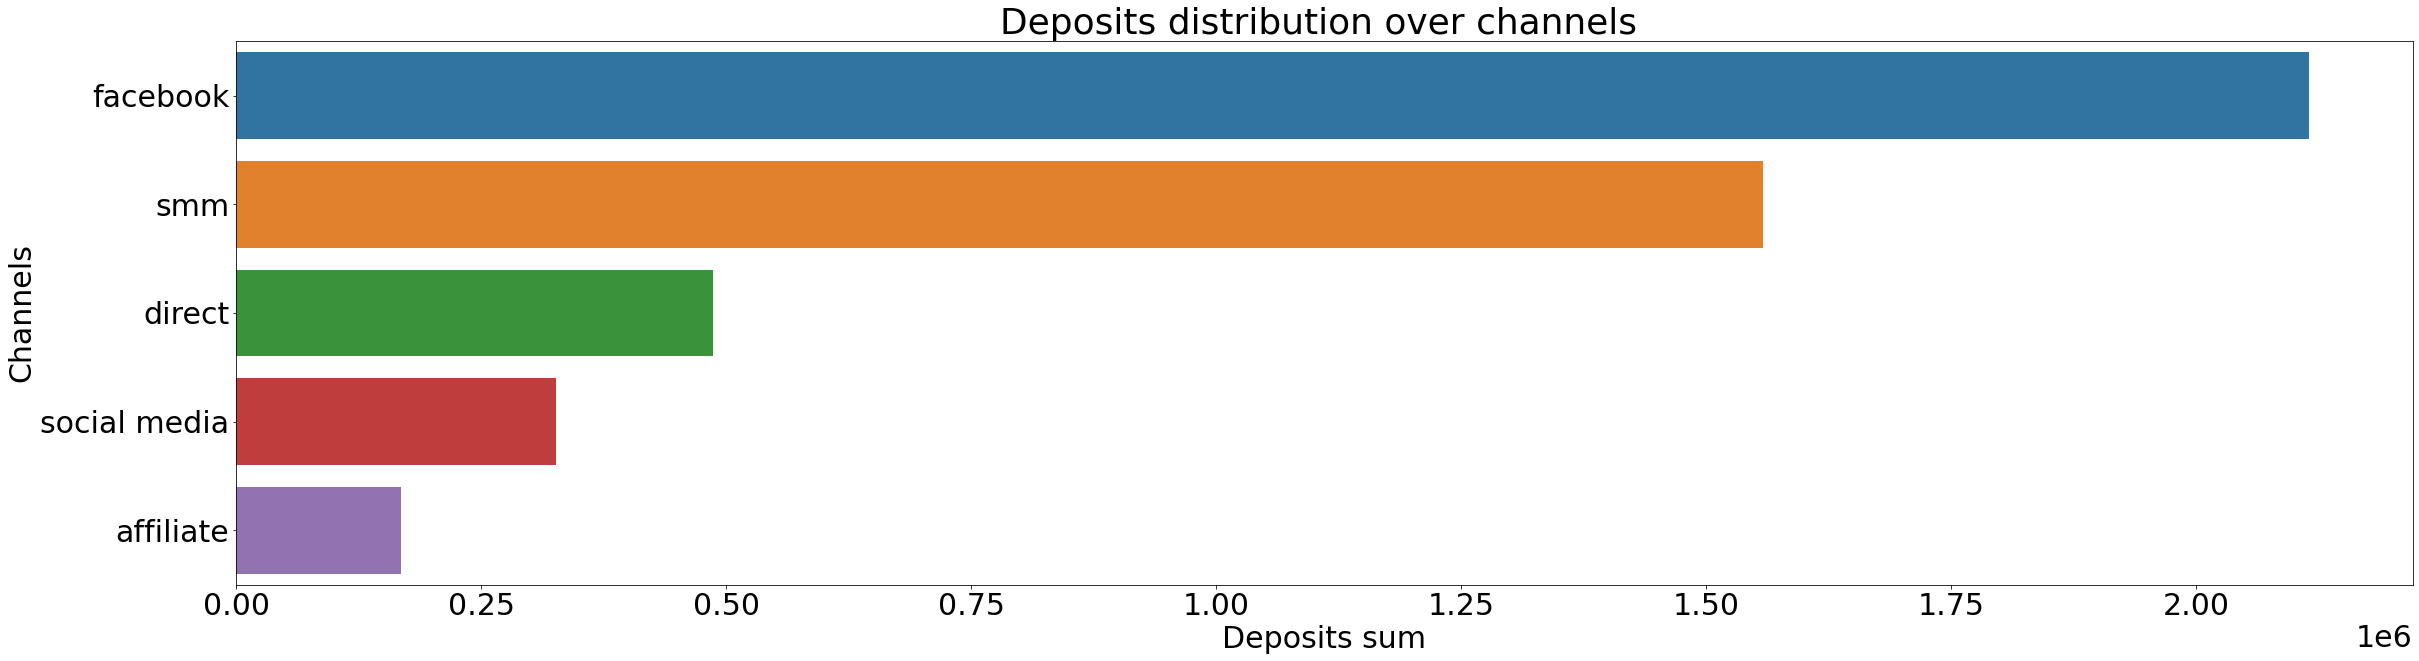

In [28]:
# Visualisation of deposits distribution over channels.
font = {'family': 'normal', 'size':'30'}
plt.rc('font',**font)
plt.figure(figsize=(39,10))
ax3=sns.barplot(channel_depo_sum.depo_sum,channel_depo_sum.channel)
ax3.set_title('Deposits distribution over channels ')
ax3.set_xlabel('Deposits sum')
ax3.set_ylabel('Channels')

визуализировать каналы для телеграма и кналы для постов на одном графике

In [29]:
# Finding depo sum for posts channels.
post_users_depo_sum = post_users\
                               .groupby('channel',as_index = False)\
                               .agg({'depo':'sum'})\
                               .rename(columns = {'depo':'depo_sum'})\
                               .sort_values('depo_sum',ascending = False) 
post_users_depo_sum['channel_post'] = 'post ' + post_users_depo_sum.channel 
post_users_depo_sum = post_users_depo_sum.drop(['channel'], axis=1)
post_users_depo_sum

,depo_sum,channel_post
2,1901796,post facebook
3,989751,post smm
1,372166,post direct
0,112431,post affiliate
4,0,post social media


In [30]:
# Finding depo sum for telegram channels.
telegram_users_depo_sum = telegram_users\
                                        .groupby('channel',as_index = False)\
                                        .agg({'depo':'sum'})\
                                        .rename(columns = {'depo':'depo_sum'})\
                                        .sort_values('depo_sum',ascending = False) 
telegram_users_depo_sum['channel_post'] = 'telegram ' + telegram_users_depo_sum.channel 
telegram_users_depo_sum = telegram_users_depo_sum.drop(['channel'], axis=1)
telegram_users_depo_sum

,depo_sum,channel_post
3,568077,telegram smm
4,325849,telegram social media
2,213035,telegram facebook
1,114280,telegram direct
0,55644,telegram affiliate


In [31]:
# Union of telegram and posts depo sum.
telegram_users_depo_sum = pd.concat([post_users_depo_sum, telegram_users_depo_sum])
telegram_users_depo_sum

,depo_sum,channel_post
2,1901796,post facebook
3,989751,post smm
1,372166,post direct
0,112431,post affiliate
4,0,post social media
3,568077,telegram smm
4,325849,telegram social media
2,213035,telegram facebook
1,114280,telegram direct
0,55644,telegram affiliate


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Channels')

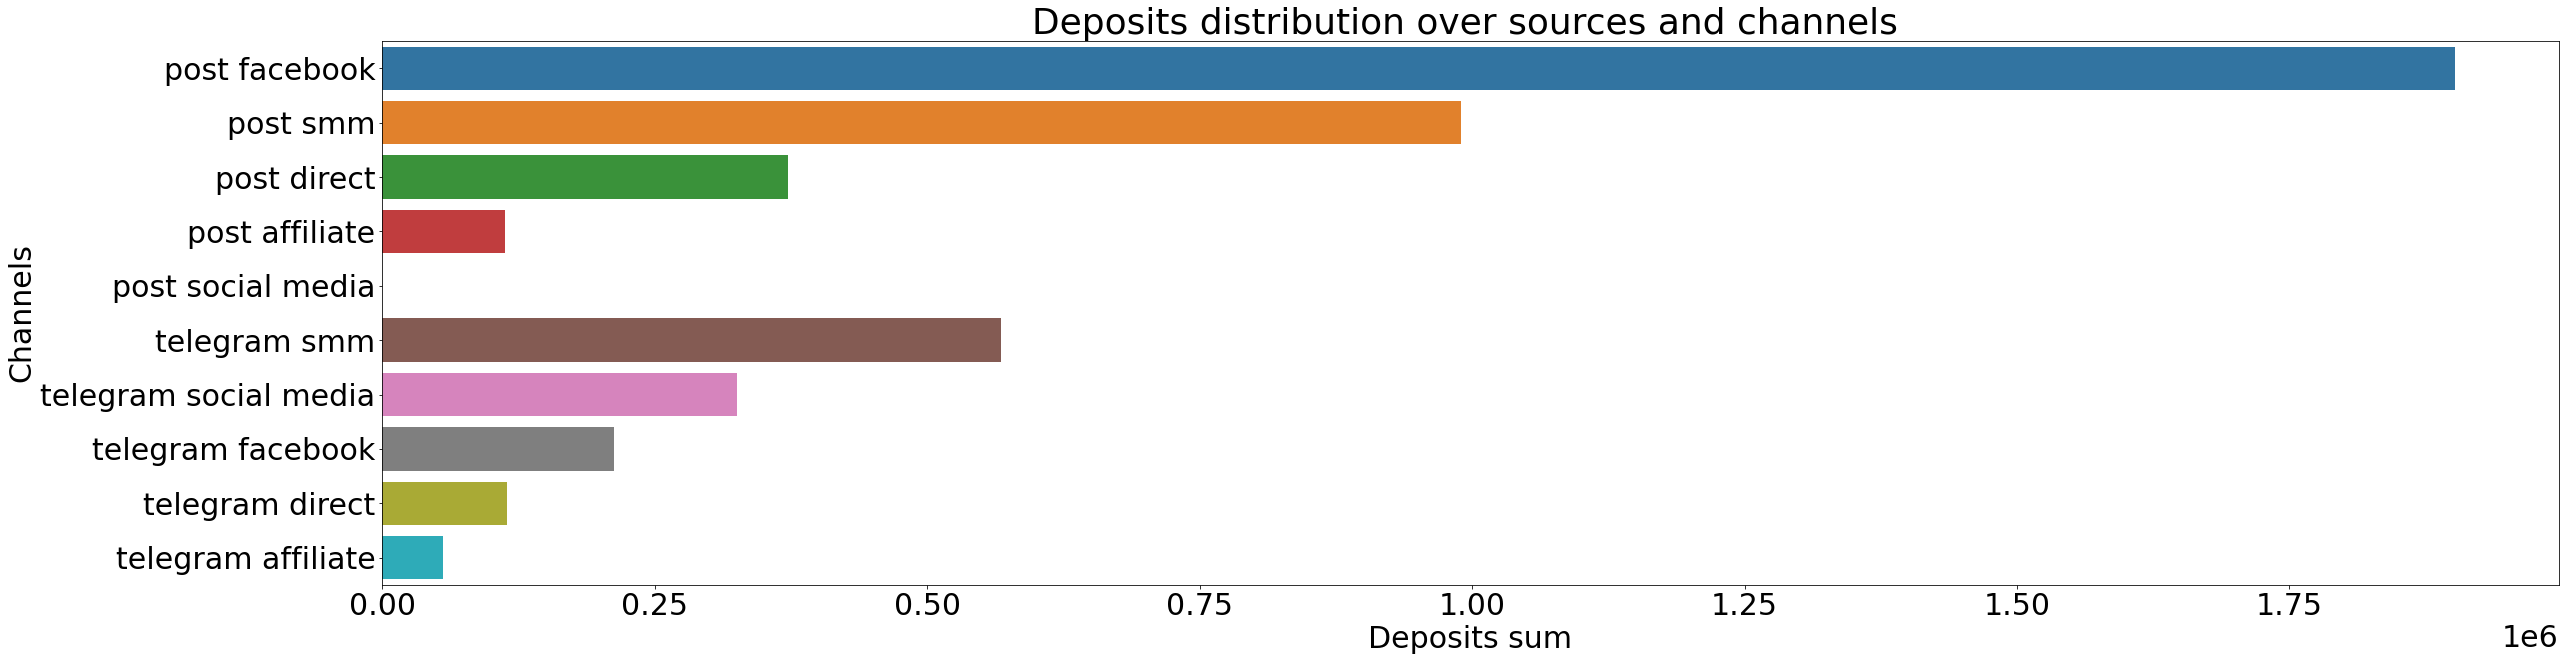

In [32]:
# Visualisation of deposits distribution over sources and channels.
font = {'family': 'normal', 'size':'30'}
plt.rc('font',**font)
plt.figure(figsize=(39,10))
ax3=sns.barplot(telegram_users_depo_sum.depo_sum,telegram_users_depo_sum.channel_post)
ax3.set_title('Deposits distribution over sources and channels ')
ax3.set_xlabel('Deposits sum')
ax3.set_ylabel('Channels')

Answer:
    
There are three distributions.
    

# 5). What are your advices to marketing team in order to optimize their activity?

1). Develop advertisements in facebook to create attractive way to telegram for users. For example facebook gives the biggest amount of users for posts and the best conversion rate for posts. That is why it is very important to develop marketing in facebook with links to telegram also. It can give more users then it is now.

2). There are zero users, who has come from social media in post source. It looks strangely because social media in telegram has given 325849 profit. So this problem must be checked. Perhaps it is a technical wrong or users can not buy in this way.

3). The best segment of users is smm too telegram. It has the best conversion rate. Focus marketing activities on finding the same customers

4). Affiliate channel has low efficiency for posts. Such as amount of users from facebook to posts is 7.06 times as large as from affiliate to post. But total deposit from facebook to post is 12.58 times as large as from affiliate. So it is important to develop markeiting in affiliate to post and telegram. 

5). Direct lag behind the facebook source in terms of conversion rate and amount of deposit distribution. From direct users successfully
 go to telegram, but to post it is worse. That is why it needs to do this channel more attractive for post users.

Let's check is there relation between negative outliers and deposits lack in post from social media

In [41]:
# Finding amount of negative depo.
negative_profit = initial_data.query("depo < 0")
negative_profit

,Unnamed: 0,depo,segment,channel,clicks,latency,client_id,country,T_F_postid
494,247,-3,telegram,social media,0.0,3.393788,5930737,LU,False
495,247,-3,telegram,social media,0.0,3.393788,5930737,LU,False
1788,894,-6,telegram,social media,4.0,1.906850,5131530,FR,False
1789,894,-6,telegram,social media,4.0,1.906850,5131530,FR,False
3552,1776,-20,telegram,direct,31.0,2.078781,5818342,IN,False
...,...,...,...,...,...,...,...,...,...
210203,148449,-31,telegram,affiliate,36.0,3.111986,7188598,IT,False
212756,151002,-62,telegram,affiliate,40.0,3.000000,6488222,IT,False
213360,151606,-18,telegram,social media,45.0,2.213038,1309043,LT,False
216144,154390,-11,telegram,direct,34.0,3.812777,8125744,MO,False


In [38]:
# Finding users from social media with negative depo.
post_social_media = initial_data.query("channel == 'social media' and segment != 'telegram' and depo < 0")
post_social_media

,Unnamed: 0,depo,segment,channel,clicks,latency,client_id,country,T_F_postid


There is no relation between negative outliers and deposits lack in post from social media

Here there are some calculations for 5) task.

In [8]:
# Calculation of telegram usage number.
initial_data.query('segment == "telegram"').client_id.count()

61940

In [9]:
# Calculation of post usage number.
initial_data.query('segment != "telegram"').client_id.count()

157374

In [67]:
# Mean bill in posts.
3400466/157374

21.607546354543953

In [10]:
# Mean bill in telegram.
1281714/61940

20.692831772683242

In [71]:
# Calculation of telegram usage number for every channel.
initial_data.query('segment == "telegram"').groupby('channel').agg({'client_id':'count'})

,client_id
channel,
affiliate,3140
direct,6050
facebook,20855
smm,19136
social media,12127


In [72]:
# Calculation of posts usage number for every channel.
initial_data.query('segment != "telegram"').groupby('channel').agg({'client_id':'count'})

,client_id
channel,
affiliate,7693
direct,15732
facebook,55662
smm,46807
social media,29863


In [73]:
# Calculation of all usage number for every channel.
initial_data.groupby('channel').agg({'client_id':'count'})

,client_id
channel,
affiliate,10833
direct,21782
facebook,76517
smm,65943
social media,41990
